# Webscraping for used car data via BeatifulSoup

In [4]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
from selenium import webdriver

## AutoTrader

The largest used car website in the UK

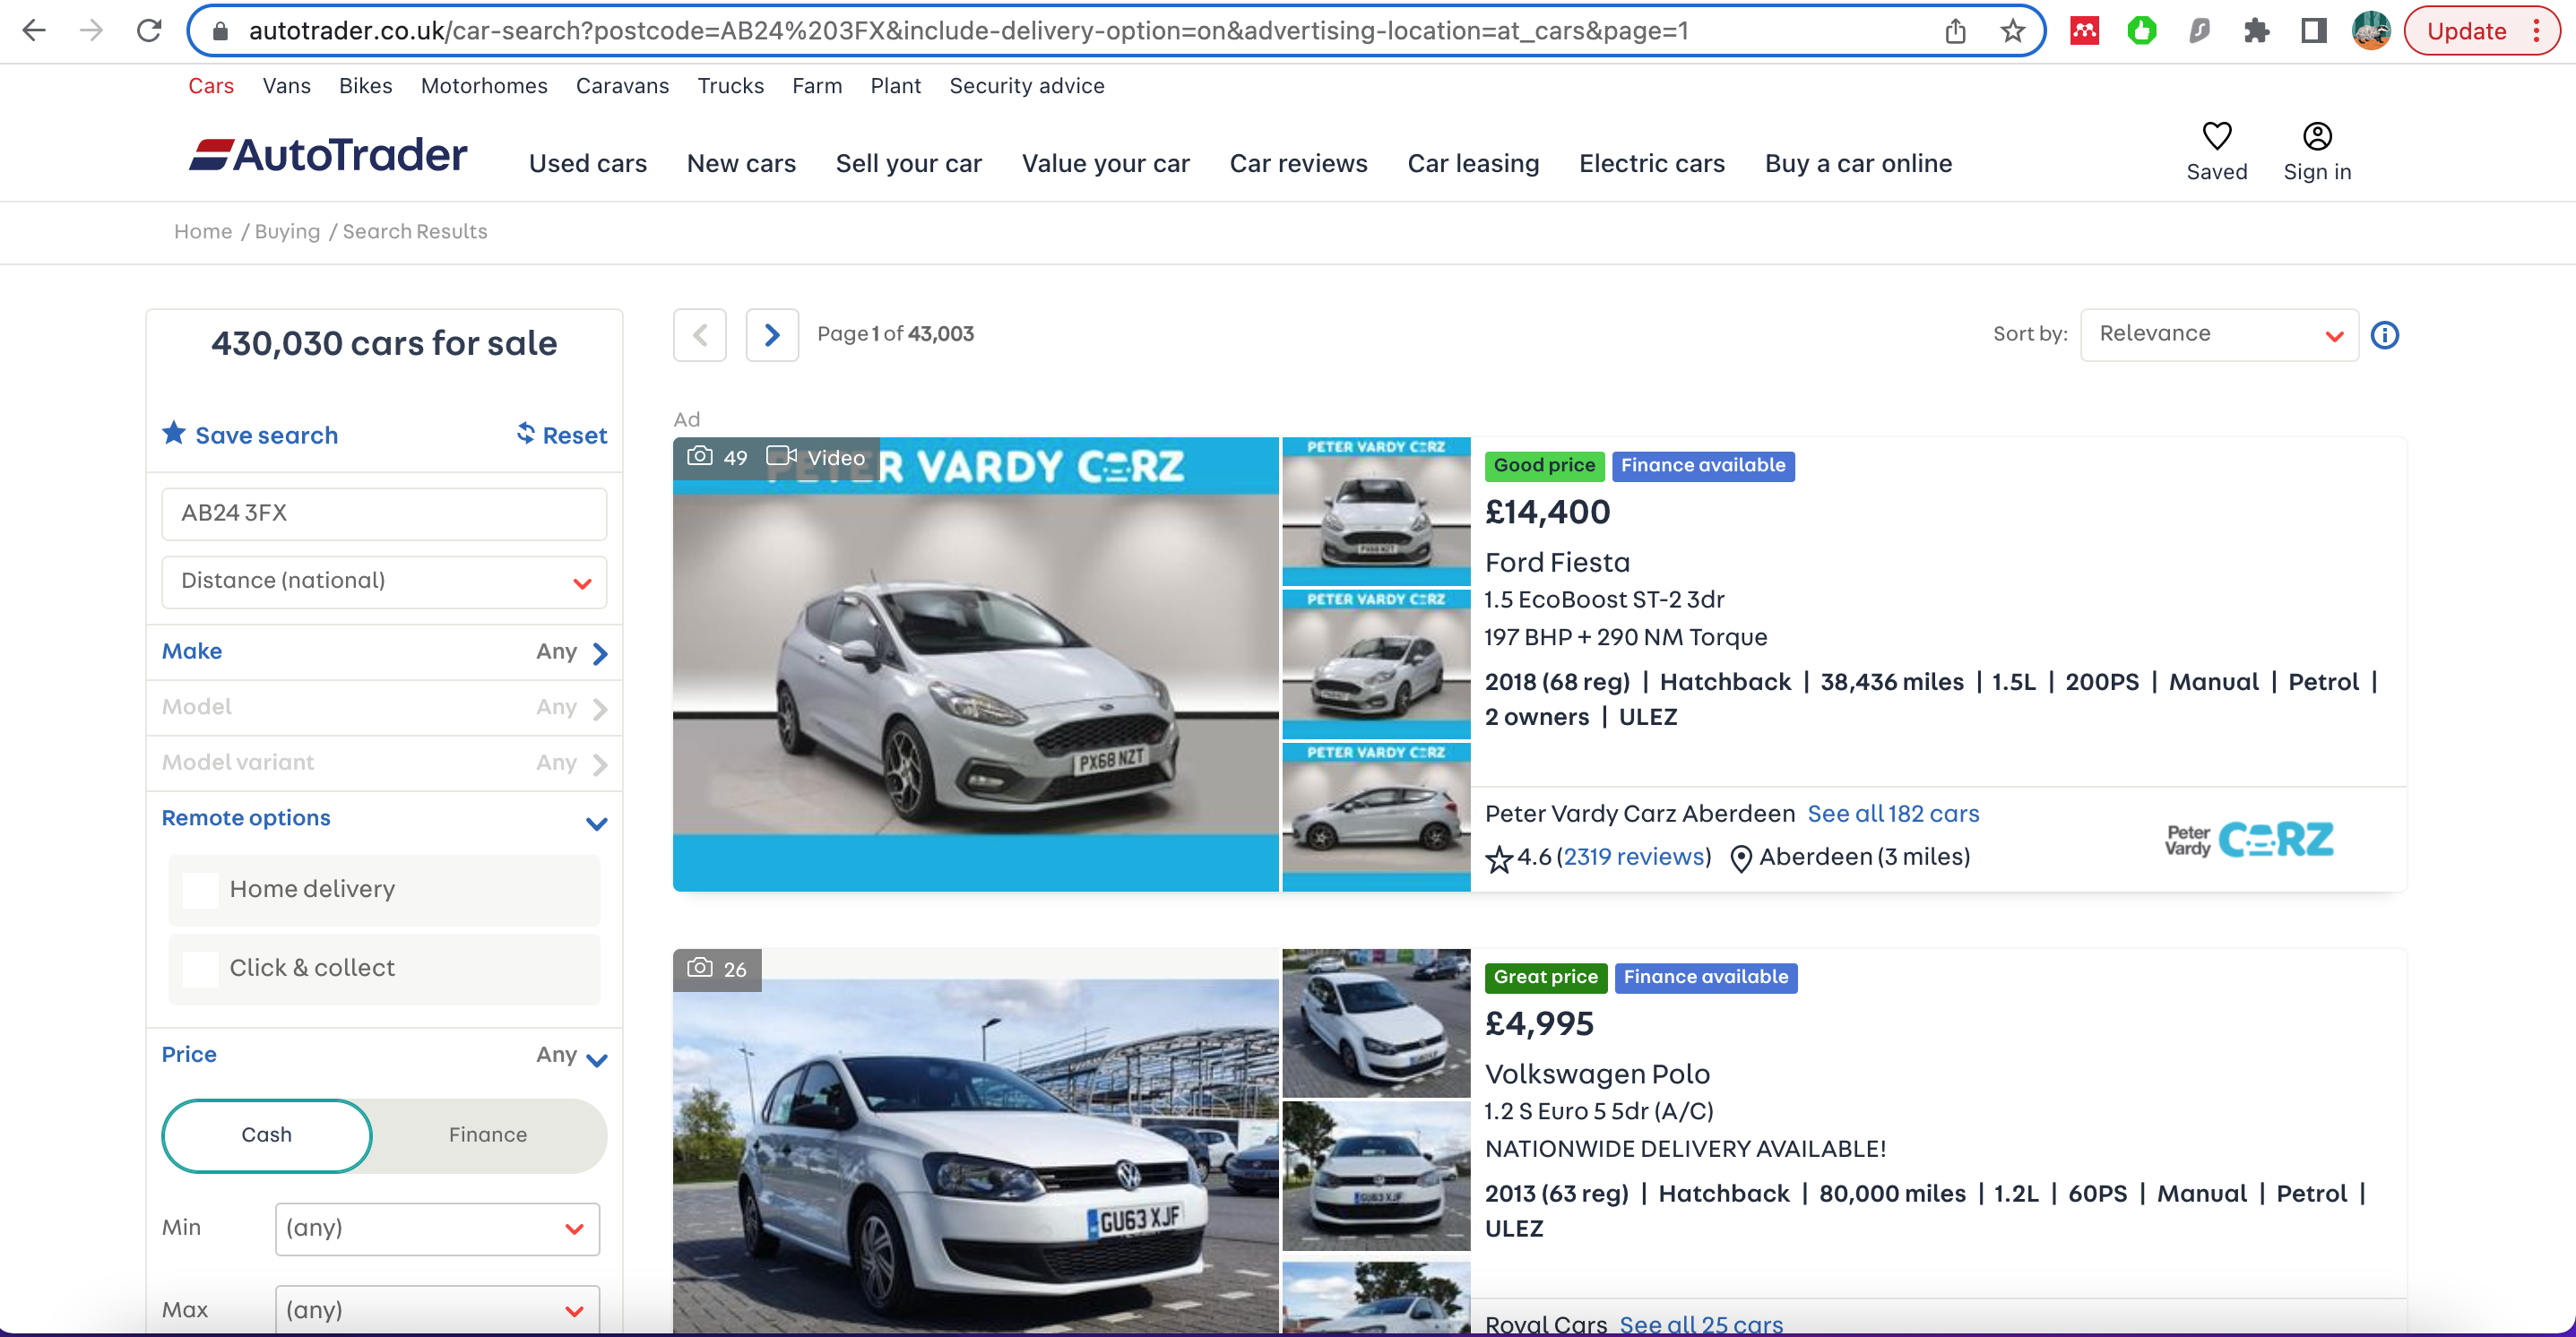

In [5]:
name = [] 
price = []
seller = []

specs_all = []

for i in range(1,101):
    # website in url
    url = "https://www.autotrader.co.uk/car-search?sort=price-asc&postcode=ab125eb&radius=1500&include-delivery-option=on&page="+ str(i)
    
    #request to website
    response = requests.get(url, headers = {'User-Agent': 'Mozilla/5.0'})
    
    #soup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # the details of the cars are stored in <div>, class = "product-card__inner", parse details and store in results variable
    results = soup.find_all('div', {'class':"product-card__inner"}) 
    
    
    for result in results:
        name.append(result.find('h3').get_text().strip())
        price.append(result.find('div', {'class':"product-card-pricing__price"}).get_text().strip())
        seller.append(result.find('h3', {'class':"product-card-seller-info__name atc-type-picanto"}).get_text().strip())
        
        
        specs_all.append(result.find_all('li', {'class': 'atc-type-picanto--medium'}))  

In [1]:
def match(pattern):
    specs_text = []
    for s in specs_all:
        ind = []
        for i in s:
        
            ind.append(i.get_text())
        specs_text.append(ind)
    
    output = []
    
    for spec in specs_text:
    
        mi = []
        for s in spec:
            m = re.search(pattern, s)
        
            if m != None:
                mi.append(m.string)
                spec.remove(s)
            elif m == None and len(mi)==0  and spec.index(s) == len(spec)-1:
                mi.append(np.NaN)
        output.extend(mi)
    
    return output

In [6]:
specs_text = []
for s in specs_all:
    ind = []
    for i in s:
        ind.append(i.get_text())
    specs_text.append(ind)
    
  

In [14]:
for i,spec in enumerate(specs_text):
    d = ' '.join(spec)
    m = re.search('(Petrol)|(Diesel)|(Electric)', d)
    if m == None:
                print(d)   


2004 (04 reg) 75,000 miles


In [11]:
  
    for i,spec in enumerate(specs_text):
    
        mi = []
        for k,s in enumerate(spec):
            m = re.search('(Petrol)|(Diesel)', ' '.join(s)
        
            if m == None:
                print(s)
                

2005 (05 reg)
MPV
54,000 miles
2.0L
137BHP
Automatic
Petrol
5 owners
2003 (52 reg)
Hatchback
148,000 miles
2.0L
140BHP
Manual
Petrol
4 owners
2003 (53 reg)
Hatchback
139,080 miles
1.2L
65BHP
Manual
Petrol
1 owner
ULEZ
2009 (09 reg)
Estate
89,000 miles
1.4L
Manual
Petrol
5 owners
2001 (Y reg)
Hatchback
94,000 miles
1.4L
101BHP
Manual
Petrol
2005 (54 reg)
Saloon
130,122 miles
1.8L
115BHP
Manual
Petrol
5 owners
2005 (55 reg)
Hatchback
132,950 miles
1.4L
75PS
Manual
Diesel
2 owners
Part service history
2010 (60 reg)
Hatchback
88,248 miles
1.0L
68PS
Manual
Petrol
3 owners
ULEZ
2006 (56 reg)
Hatchback
127,000 miles
1.5L
106BHP
Manual
Diesel
No service history
2007 (07 reg)
Hatchback
85,750 miles
1.6L
110BHP
Automatic
Petrol
ULEZ
2021
Hatchback
0.9L
86PS
Manual
Petrol
First year road tax included
Full manufacturer warranty
ULEZ
2006 (06 reg)
Hatchback
123,725 miles
1.2L
79BHP
Manual
Petrol
3 owners
ULEZ
2007 (07 reg)
Hatchback
128,000 miles
1.6L
113BHP
Manual
Petrol
2 owners
ULEZ
2002 (02 reg

In [15]:
year = match('\d\d\d\d')
mileage = match('\d{0,13}\d\s?miles')
transmission = match('(Automatic)|(Manual)')
horsepower = match('\d+\d[a-zA-Z]+')
fuel = match('(Petrol)|(Diesel)|(Electric)')
ulez = match('ULEZ')
engine = match('\d+\.\d')
owner = match('\d\s+own[a-z]')

In [16]:
used_cars = pd.DataFrame({'Name': name,'Year': year, 'Mileage': mileage, 'Engine_Size': engine, 
                          'Horsepower': horsepower, 'Transmission': transmission, 'Fuel_Type': fuel , 'Seller': seller,'Previous_Owners':owner,'ULEZ' : ulez, 'Price(£)': price})

In [17]:
used_cars

,Name,Year,Mileage,Engine_Size,Horsepower,Transmission,Fuel_Type,Seller,Previous_Owners,ULEZ,Price(£)
0,Citroen Xsara Picasso,2005 (05 reg),"54,000 miles",2.0L,137BHP,Automatic,Petrol,Private seller,5 owners,NaN,£75
1,Chrysler PT Cruiser,2003 (52 reg),"148,000 miles",2.0L,140BHP,Manual,Petrol,Private seller,4 owners,NaN,£350
2,Volkswagen Polo,2003 (53 reg),"139,080 miles",1.2L,65BHP,Manual,Petrol,Private seller,1 owner,ULEZ,£375
3,Peugeot 207,2009 (09 reg),"89,000 miles",1.4L,NaN,Manual,Petrol,Ma Car Sales,5 owners,NaN,£395
4,Rover 45,2001 (Y reg),"94,000 miles",1.4L,101BHP,Manual,Petrol,Sunnybank Car Sales,NaN,NaN,£395
...,...,...,...,...,...,...,...,...,...,...,...
1095,Mercedes-Benz A Class,2002 (52 reg),"102,000 miles",1.6L,102BHP,Manual,Petrol,Private seller,3 owners,NaN,"£1,050"
1096,Ford KA,2006 (06 reg),"55,090 miles",1.3L,69BHP,Manual,Petrol,RKB Motors,2 owners,ULEZ,"£1,050"
1097,Fiat Grande Punto,2008 (08 reg),"80,000 miles",1.2L,65BHP,Manual,Petrol,Autopark UK,NaN,ULEZ,"£1,050"
1098,Ford Mondeo,2006 (56 reg),"94,500 miles",1.8L,123BHP,Manual,Petrol,Private seller,3 owners,ULEZ,"£1,050"


In [18]:
len(used_cars['Mileage'])

1100

In [19]:
used_cars.to_csv("used_cars.csv", index=False)